<a href="https://colab.research.google.com/github/abhi-11nav/Alzheimer-Detection/blob/main/Alzheimer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET CREDITS 


https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

In [1]:
# Cloning the github repository for reading data 

!git clone https://github.com/abhi-11nav/Alzheimer-Detection.git

Cloning into 'Alzheimer-Detection'...
remote: Enumerating objects: 6419, done.
remote: Counting objects: 100% (6419/6419), done.
remote: Compressing objects: 100% (6417/6417), done.
remote: Total 6419 (delta 1), reused 6412 (delta 0), pack-reused 0
Receiving objects: 100% (6419/6419), 32.99 MiB | 17.72 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
# Specifying the train and test paths 

train_path = "/content/Alzheimer-Detection/Alzheimer's data/train"

test_path = "/content/Alzheimer-Detection/Alzheimer's data/test"

## LOADING PRE-TRAINED MODEL : TRANSFER LEARNING

In [3]:
# Importing libraries 

import tensorflow 
from tensorflow import keras 

from keras.models import Model, Sequential 
from keras.layers import Input, Dense, Flatten, Dropout

from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

#from keras.applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3

from glob import glob 

In [4]:
# declaring image size

image_size = [224,224]

In [5]:
# Calling the pre-trained model 

model = InceptionV3(include_top= False, weights="imagenet",input_shape= image_size+[3])

87924736/87910968 [==============================] - 6s 0us/step


In [6]:
# Freezing the weights in all layers to reduce the burden of training the model . 

for layers in model.layers:
  layers.trainable = False

In [7]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [8]:
# Adding the output layers 

output_layer1 = Flatten()(model.output)

In [9]:
# Adding the final layer 

final_layer = Dense(len(glob(train_path+"/*")), activation="softmax")(output_layer1)

In [10]:
final_model = Model(inputs = model.inputs, outputs = final_layer)

In [11]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [22]:
# Defining the optimizer and learning rate scheduler 

learning_rate_scheduler = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 0.005,decay_steps = 10000, decay_rate=0.2)

optimizer = keras.optimizers.Adam(learning_rate = learning_rate_scheduler)

In [23]:
# Compiling the model 

final_model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'])

The model is complete. Now let us work on some data preprocessing 

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2, rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_data = train_datagen.flow_from_directory(train_path, target_size=(224,224),batch_size=16,class_mode="categorical")

test_data = train_datagen.flow_from_directory(test_path, target_size=(224,224),batch_size=16,class_mode="categorical")

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [26]:
# Implementing callbacks  

bestModel_callback = keras.callbacks.ModelCheckpoint("Model.h5", save_best_only=True)

In [28]:
history = final_model.fit(train_data, validation_data=test_data, epochs=5, callbacks=[bestModel_callback])

Epoch 1/5
321/321 [==============================] - 73s 226ms/step - loss: 119.4293 - accuracy: 0.6227 - val_loss: 182.6385 - val_accuracy: 0.4824
Epoch 2/5
321/321 [==============================] - 72s 223ms/step - loss: 110.5083 - accuracy: 0.6219 - val_loss: 185.5443 - val_accuracy: 0.5207
Epoch 3/5
321/321 [==============================] - 73s 227ms/step - loss: 100.0021 - accuracy: 0.6405 - val_loss: 154.4338 - val_accuracy: 0.5481
Epoch 4/5
321/321 [==============================] - 72s 225ms/step - loss: 94.6888 - accuracy: 0.6440 - val_loss: 158.3373 - val_accuracy: 0.5145
Epoch 5/5
321/321 [==============================] - 72s 224ms/step - loss: 89.0885 - accuracy: 0.6487 - val_loss: 174.9423 - val_accuracy: 0.5231


In [ ]:
# Importing visualization libraries 

import matplotlib.pyplot as plt 
%matplotlib inline 

##### VISUALIZING THE MODEL PERFOMANCE : LOSS AND ACCURACY

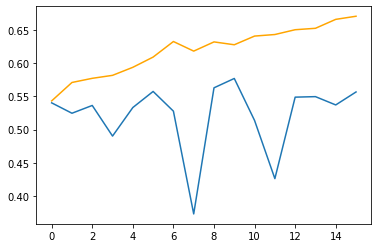

In [ ]:
plt.plot(history.history["accuracy"], color="orange")
plt.plot(history.history["val_accuracy"])

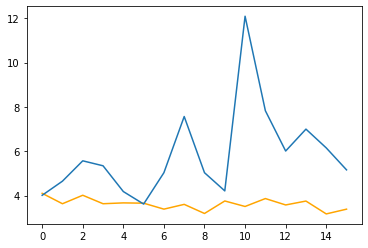

In [ ]:
plt.plot(history.history["loss"], color="orange")
plt.plot(history.history["val_loss"])